<a href="https://colab.research.google.com/github/focccus/MVE550-Stochastic-processes/blob/main/A1/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Install the truncnorm and ggplot2 packages if not already installed
required_libs <- c("truncnorm", "ggplot2")

for (lib in required_libs) {
  if (!requireNamespace(lib, quietly = TRUE)) {
    install.packages(lib)
  }
  library(lib, character.only = TRUE)  # Use character.only = TRUE
}


## 1: Baysian Inference

In [26]:
data <- c(12, 21, 12, 13, 11,19)  # Example data


# Compute parameters for posterior
alpha <- sum(data)         # Shape parameter
beta <- length(data)       # Rate parameter

(a) Using a prior that is proportional to 1/λ, find the distribution for, and plot using R, the posterior distribution for λ given the data.

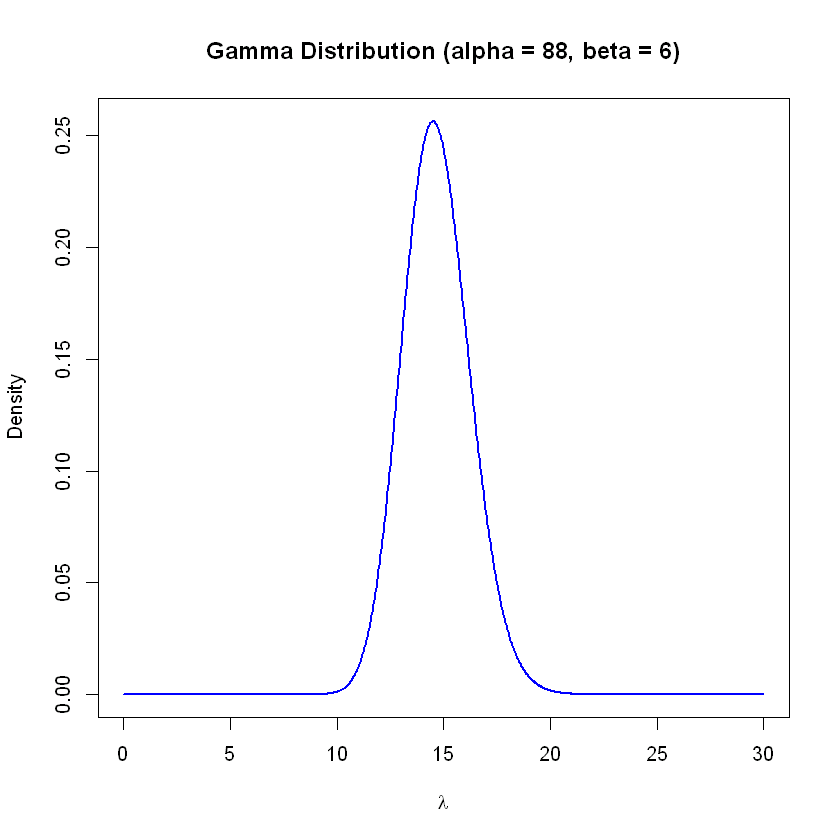

In [27]:
# Set the parameters for the Gamma distribution

# Define a sequence of values for lambda (x-axis values)
lambda <- seq(0, 30, length.out = 1000)

# Calculate the density of the Gamma distribution
gamma_density <- dgamma(lambda, shape = alpha, rate = beta)

# Plot the Gamma distribution
plot(lambda, gamma_density, type = "l",
     main = "Gamma Distribution (alpha = 88, beta = 6)",
     xlab = expression(lambda),
     ylab = "Density",
     col = "blue", lwd = 2)


(b) Find the distribution for, and plot using R, the predictive distribution for the number of requests for the 7th day, based on the given data.

[1] 0.06320352


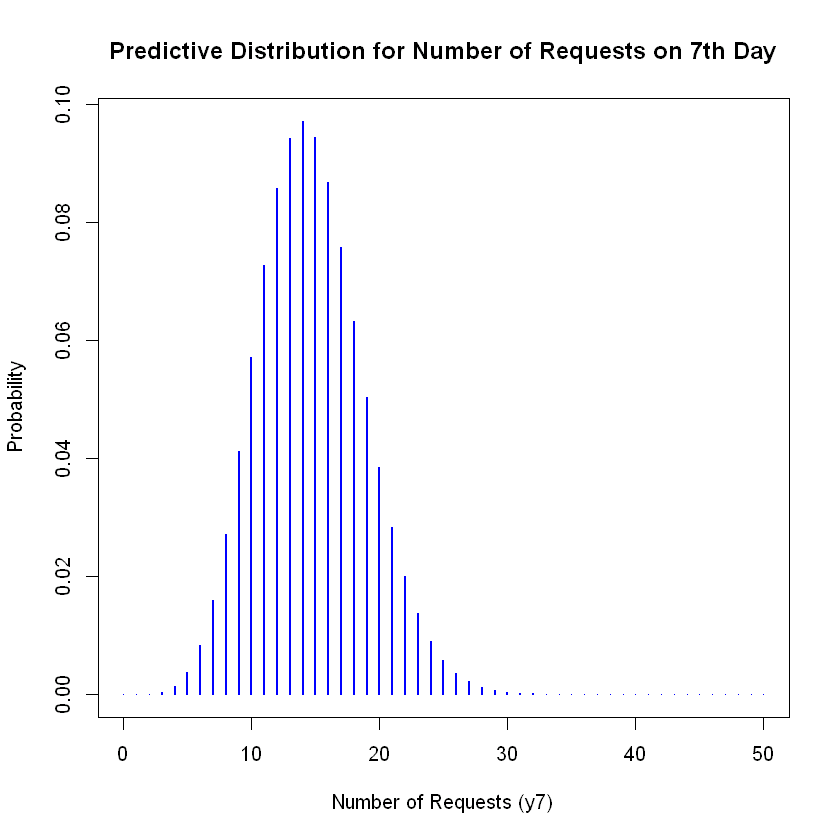

In [28]:
# Set parameters for the Negative Binomial distribution
alpha <- 88
beta <- 6
p <- beta / (1 + beta)  # probability of success for Negative Binomial

# Generate values for y7 (number of requests)
y7_values <- 0:50  # range of possible values for requests on the 7th day

# Calculate the probability mass function for the Negative Binomial distribution
predictive_distribution <- dnbinom(y7_values, size = alpha, prob = p)

print(predictive_distribution[18+1])

# Plot the predictive distribution
plot(y7_values, predictive_distribution, type = "h",
     main = "Predictive Distribution for Number of Requests on 7th Day",
     xlab = "Number of Requests (y7)",
     ylab = "Probability",
     col = "blue", lwd = 2)


(c) Using discretization, re-do question (a) and re-compute the probability of getting exactly 18 requests on the seventh day. Make your choices so that you get satisfactory accuracy.

In [29]:

# Number of discretization points
n_points <- 1000  # You can adjust this for higher accuracy

# Discretize the range of lambda
lambda_values <- seq(1, 30, length.out = n_points)  # Choose an appropriate range for lambda

In [30]:
delta_lambda <- lambda_values[2]-lambda_values[1] # Calculate the step size
#prior_density <- dgamma(lambda_values, shape = 0, rate = 0)
prior_density <- 1/lambda_values
cat(prior_density)

1 0.9717899 0.9451277 0.9198895 0.8959641 0.8732517 0.8516624 0.8311148 0.8115353 0.7928571 0.7750194 0.7579666 0.7416481 0.7260174 0.711032 0.6966527 0.6828435 0.669571 0.6568047 0.6445161 0.6326789 0.6212687 0.6102627 0.5996399 0.5893805 0.5794664 0.5698802 0.5606061 0.5516289 0.5429348 0.5345104 0.5263435 0.5184224 0.5107362 0.5032746 0.4960278 0.4889868 0.4821429 0.4754879 0.4690141 0.4627142 0.4565814 0.4506089 0.4447907 0.4391209 0.4335938 0.428204 0.4229467 0.4178168 0.4128099 0.4079216 0.4031477 0.3984842 0.3939274 0.3894737 0.3851195 0.3808616 0.3766968 0.3726222 0.3686347 0.3647317 0.3609104 0.3571684 0.3535032 0.3499124 0.3463939 0.3429454 0.3395649 0.3362504 0.333 0.3298118 0.3266841 0.3236152 0.3206033 0.3176471 0.3147448 0.3118951 0.3090965 0.3063477 0.3036474 0.3009943 0.2983871 0.2958247 0.2933059 0.2908297 0.2883949 0.2860006 0.2836457 0.2813292 0.2790503 0.276808 0.2746014 0.2724298 0.2702922 0.2681879 0.2661161 0.2640761 0.2620672 0.2600885 0.2581395 0.2562195 0.2543

In [31]:
cat(lambda_values)

1 1.029029 1.058058 1.087087 1.116116 1.145145 1.174174 1.203203 1.232232 1.261261 1.29029 1.319319 1.348348 1.377377 1.406406 1.435435 1.464464 1.493493 1.522523 1.551552 1.580581 1.60961 1.638639 1.667668 1.696697 1.725726 1.754755 1.783784 1.812813 1.841842 1.870871 1.8999 1.928929 1.957958 1.986987 2.016016 2.045045 2.074074 2.103103 2.132132 2.161161 2.19019 2.219219 2.248248 2.277277 2.306306 2.335335 2.364364 2.393393 2.422422 2.451451 2.48048 2.50951 2.538539 2.567568 2.596597 2.625626 2.654655 2.683684 2.712713 2.741742 2.770771 2.7998 2.828829 2.857858 2.886887 2.915916 2.944945 2.973974 3.003003 3.032032 3.061061 3.09009 3.119119 3.148148 3.177177 3.206206 3.235235 3.264264 3.293293 3.322322 3.351351 3.38038 3.409409 3.438438 3.467467 3.496496 3.525526 3.554555 3.583584 3.612613 3.641642 3.670671 3.6997 3.728729 3.757758 3.786787 3.815816 3.844845 3.873874 3.902903 3.931932 3.960961 3.98999 4.019019 4.048048 4.077077 4.106106 4.135135 4.164164 4.193193 4.222222 4.251251 4.28

In [32]:
likelihood_density <- sapply(lambda_values, function(l) prod(dpois(data, lambda = l)))
print(likelihood_density)

   [1] 6.993340e-75 7.289082e-74 7.083286e-73 6.441954e-72 5.502226e-71
   [6] 4.427896e-70 3.367359e-69 2.426692e-68 1.661450e-67 1.083287e-66
  [11] 6.741391e-66 4.012417e-65 2.288524e-64 1.253102e-63 6.598388e-63
  [16] 3.346599e-62 1.637330e-61 7.738363e-61 3.537697e-60 1.566377e-59
  [21] 6.724987e-59 2.802806e-58 1.135173e-57 4.472343e-57 1.715640e-56
  [26] 6.413995e-56 2.338920e-55 8.326096e-55 2.895640e-54 9.845697e-54
  [31] 3.275320e-53 1.066740e-52 3.403614e-52 1.064548e-51 3.265793e-51
  [36] 9.832270e-51 2.906659e-50 8.441762e-50 2.409821e-49 6.764790e-49
  [41] 1.868267e-48 5.078406e-48 1.359257e-47 3.583735e-47 9.311038e-47
  [46] 2.384788e-46 6.023460e-46 1.500848e-45 3.690337e-45 8.957207e-45
  [51] 2.146795e-44 5.082170e-44 1.188702e-43 2.747785e-43 6.279058e-43
  [56] 1.418798e-42 3.170807e-42 7.010469e-42 1.533748e-41 3.321155e-41
  [61] 7.119468e-41 1.511198e-40 3.176874e-40 6.615610e-40 1.364945e-39
  [66] 2.790723e-39 5.655279e-39 1.136065e-38 2.262763e-38 4.469

In [33]:
posterior_density <- likelihood_density * prior_density
posterior_density<-posterior_density/sum(posterior_density)
# Print the result
cat("discritized posterior is :", posterior_density, "\n")

discritized posterior is : 1.024602e-68 1.037805e-67 9.808344e-67 8.682079e-66 7.222699e-65 5.665096e-64 4.201722e-63 2.954922e-62 1.975446e-61 1.258372e-60 7.654777e-60 4.455809e-59 2.486702e-58 1.332919e-57 6.873808e-57 3.415785e-56 1.638053e-55 7.5913e-55 3.404296e-54 1.47911e-53 6.23369e-53 2.551191e-52 1.014961e-51 3.929127e-51 1.481469e-50 5.445368e-50 1.952852e-49 6.838638e-49 2.340249e-48 7.831854e-48 2.564958e-47 8.226182e-47 2.585202e-46 7.965856e-46 2.408042e-45 7.145461e-45 2.082388e-44 5.963198e-44 1.678783e-43 4.648477e-43 1.266549e-42 3.39716e-42 8.973705e-42 2.335404e-41 5.990356e-41 1.514967e-40 3.778916e-40 9.300211e-40 2.259032e-39 5.417428e-39 1.283033e-38 3.001814e-38 6.939924e-38 1.585877e-37 3.582969e-37 8.005465e-37 1.769324e-36 3.869096e-36 8.373233e-36 1.793725e-35 3.804446e-35 7.990817e-35 1.66243e-34 3.426365e-34 6.997532e-34 1.416307e-33 2.841512e-33 5.651927e-33 1.114737e-32 2.180459e-32 4.230508e-32 8.1428e-32 1.555094e-31 2.94717e-31 5.543458e-31 1.03500

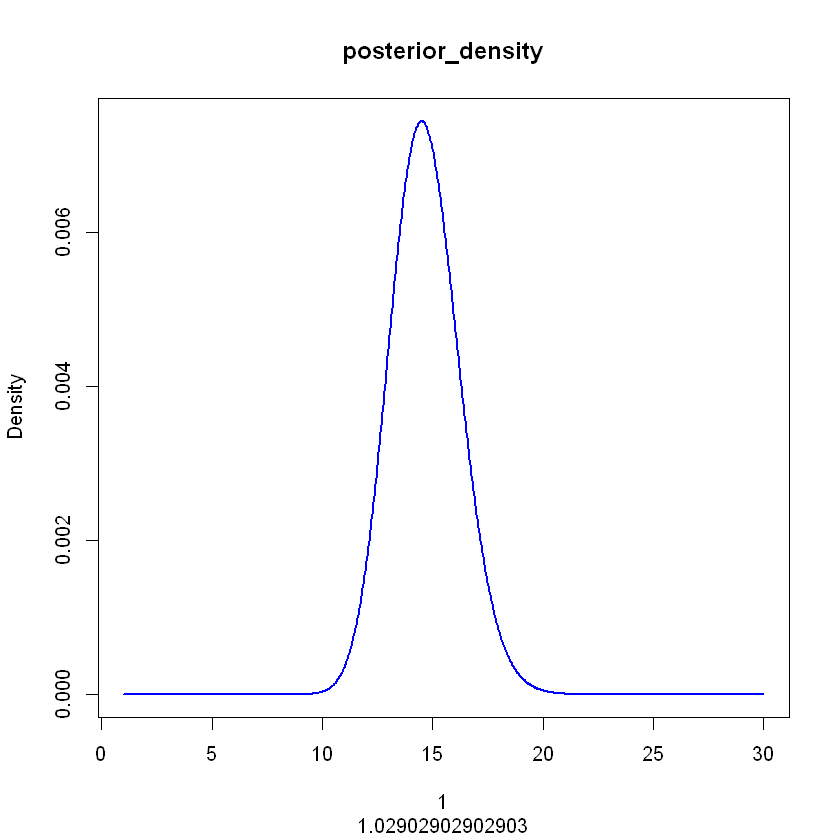

In [34]:
# Plot the Gamma distribution
plot(lambda_values, posterior_density, type = "l",
     main = "posterior_density",
     xlab = lambda_values,
     ylab = "Density",
     col = "blue", lwd = 2)

In [35]:
#posterior_density <- dgamma(lambda_values, shape = alpha, rate = beta)

y7 <- 18
predictive_probabilities <- dpois(y7, lambda = lambda_values)

# Compute the weighted sum to approximate the predictive probability
predictive_distribution <- sum(predictive_probabilities * posterior_density)

# Print the result
cat("Approximate probability of exactly 18 requests on the 7th day:", predictive_distribution, "\n")


Approximate probability of exactly 18 requests on the 7th day: 0.06320352 


(d) By using information from similar servers, one realizes that an informative prior distribution for λ (i.e., what one knows about λ before looking at the data given above) can be formulated as a normal distribution with expectation 15 and standard deviation 2, restricted(truncated) to positive values. Using discretization and this prior,re-do question (a) and re-compute the probability of getting exactly 18 requests on the seventh day.

discritized posterior is : 8.930291e-70 6.587752e-69 8.629425e-68 5.009979e-67 5.217632e-66 3.629344e-65 3.760891e-64 2.744167e-63 1.442397e-62 1.023509e-61 8.525e-61 3.36329e-60 2.18902e-59 1.201636e-58 6.089339e-58 2.775683e-57 1.652606e-56 7.227364e-56 3.276696e-55 1.387658e-54 7.786525e-54 2.689745e-53 1.096754e-52 5.050812e-52 1.562217e-51 6.636781e-51 2.300826e-50 7.812171e-50 2.909479e-49 1.00517e-48 3.060924e-48 8.871919e-48 2.829157e-47 1.074342e-46 3.683165e-46 9.496786e-46 3.49056e-45 9.3065e-45 2.471931e-44 7.162887e-44 2.20677e-43 5.957782e-43 1.456931e-42 4.162516e-42 9.556698e-42 2.496707e-41 6.908987e-41 1.691222e-40 2.711617e-40 9.228252e-40 1.737567e-39 5.369047e-39 1.039177e-38 2.302653e-38 6.975505e-38 1.394164e-37 3.21592e-37 8.284904e-37 1.641566e-36 3.024113e-36 6.363891e-36 1.686065e-35 3.203606e-35 6.782798e-35 1.622858e-34 2.420913e-34 5.208384e-34 1.092392e-33 2.643136e-33 4.786456e-33 9.602974e-33 2.057096e-32 3.978472e-32 5.470938e-32 1.037067e-31 2.641791e

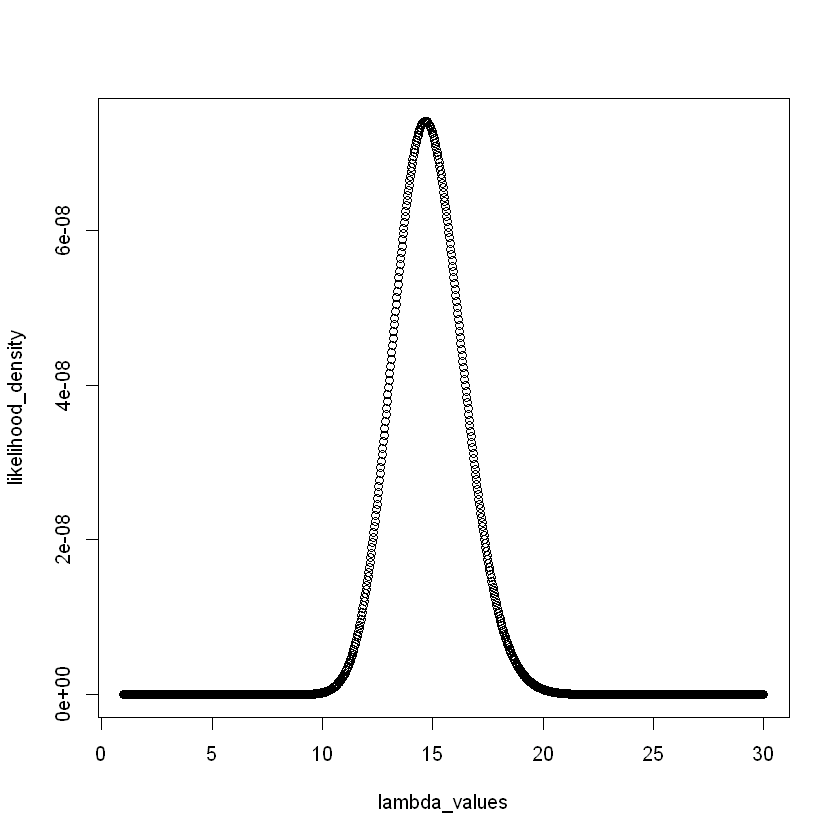

Approximate probability of exactly 18 requests on the 7th day: 0.06511755 


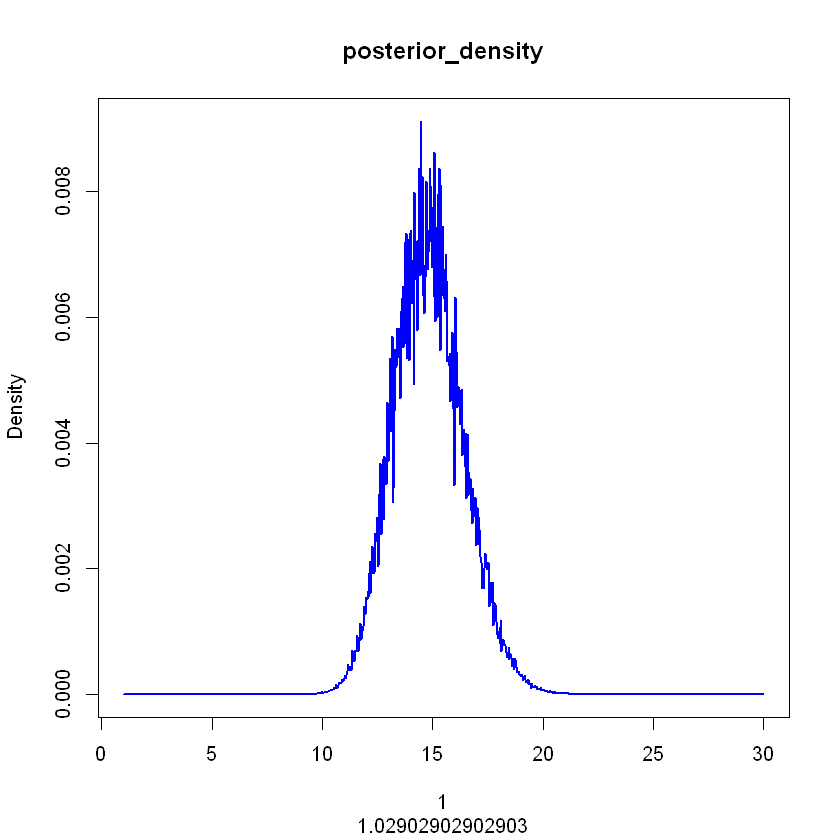

In [36]:
mean <- 15
sd <- 2
lower <- 0 # Restrict to positive values
upper <- Inf # No upper limit

normal_prior_density <- rtruncnorm(n = n_points, a = lower, b = upper, mean = mean, sd = sd)

likelihood_density <- sapply(lambda_values, function(l) prod(dpois(data, lambda = l)))
plot(lambda_values,likelihood_density)

posterior_density <- likelihood_density * normal_prior_density
posterior_density<-posterior_density/sum(posterior_density)

# Print the result
cat("discritized posterior is :", posterior_density, "\n")

plot(lambda_values, posterior_density, type = "l",
     main = "posterior_density",
     xlab = lambda_values,
     ylab = "Density",
     col = "blue", lwd = 2)

y7 <- 18
predictive_probabilities <- dpois(y7, lambda = lambda_values)

# Compute the weighted sum to approximate the predictive probability
predictive_distribution <- sum(predictive_probabilities * posterior_density)

# Print the result
cat("Approximate probability of exactly 18 requests on the 7th day:", predictive_distribution, "\n")

(e) Using the new prior, compute using numerical integration the probablity of getting exactly 18 requests on the seventh day.

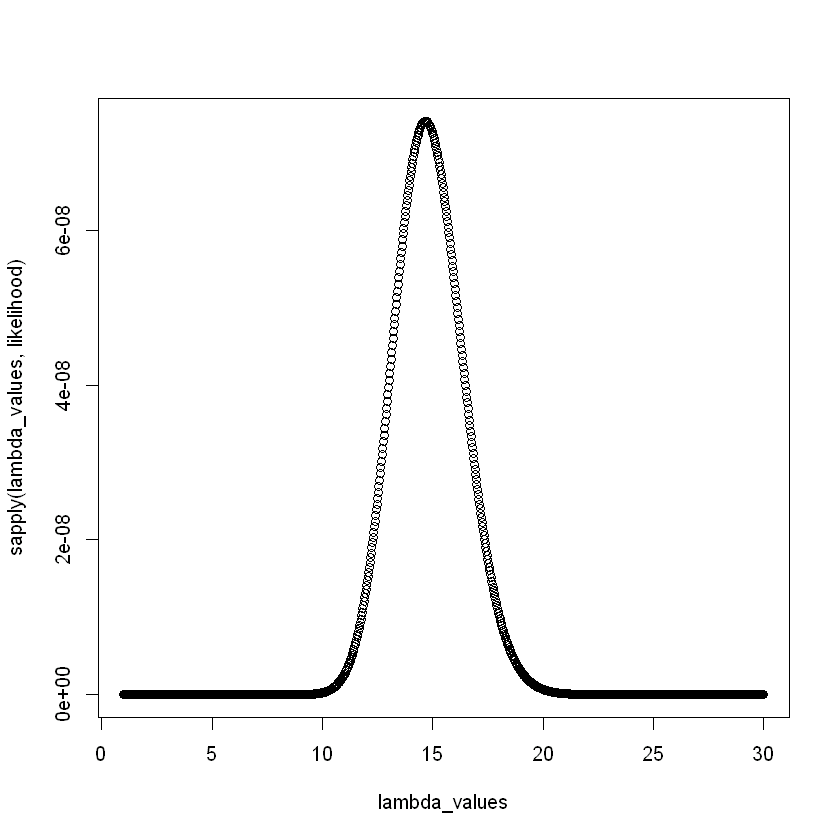

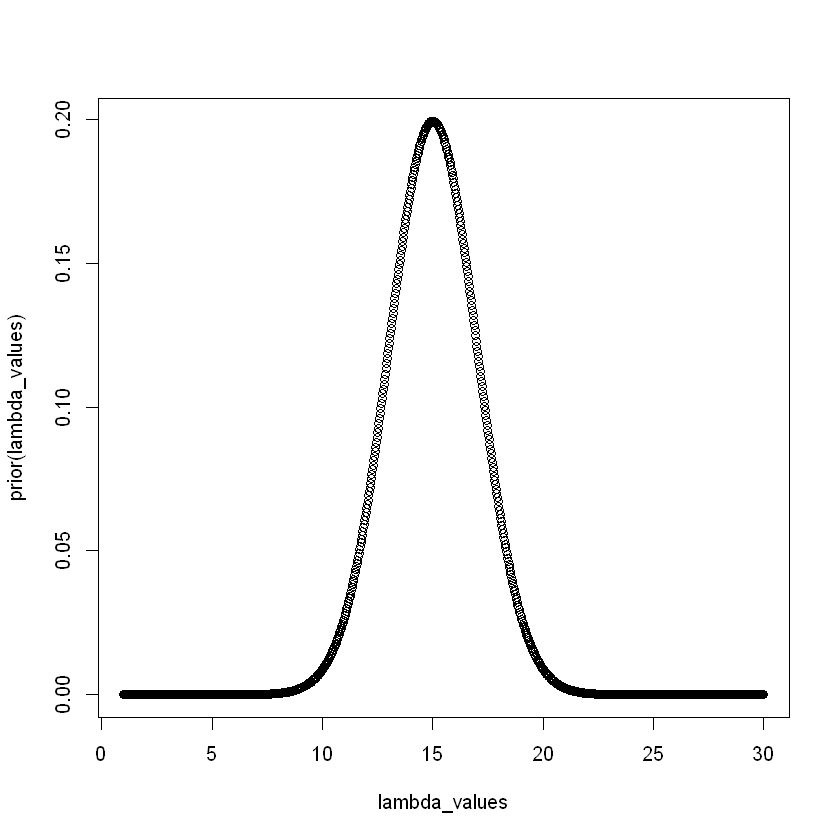

In [70]:
# Likelihood function: product of Poisson densities
upper <- Inf # No upper limit
lower=0

# likelihood_density <- sapply(lambda_values, function(l) prod(dpois(data, lambda = l)))

# Define a function to calculate likelihood density for a single lambda
likelihood <- function(lambda) {
  prod(dpois(data, lambda = lambda))
}

plot(lambda_values,sapply(lambda_values,likelihood))

# Truncated normal prior density function
prior <- function(lambda) {
  ifelse(lambda >= lower & lambda <= upper, dnorm(lambda, mean = mean, sd = sd), 0)
}

plot(lambda_values,prior(lambda_values))

In [71]:
# Posterior density function
posterior <- function(lambda) {
  likelihood(lambda) * prior(lambda)
}

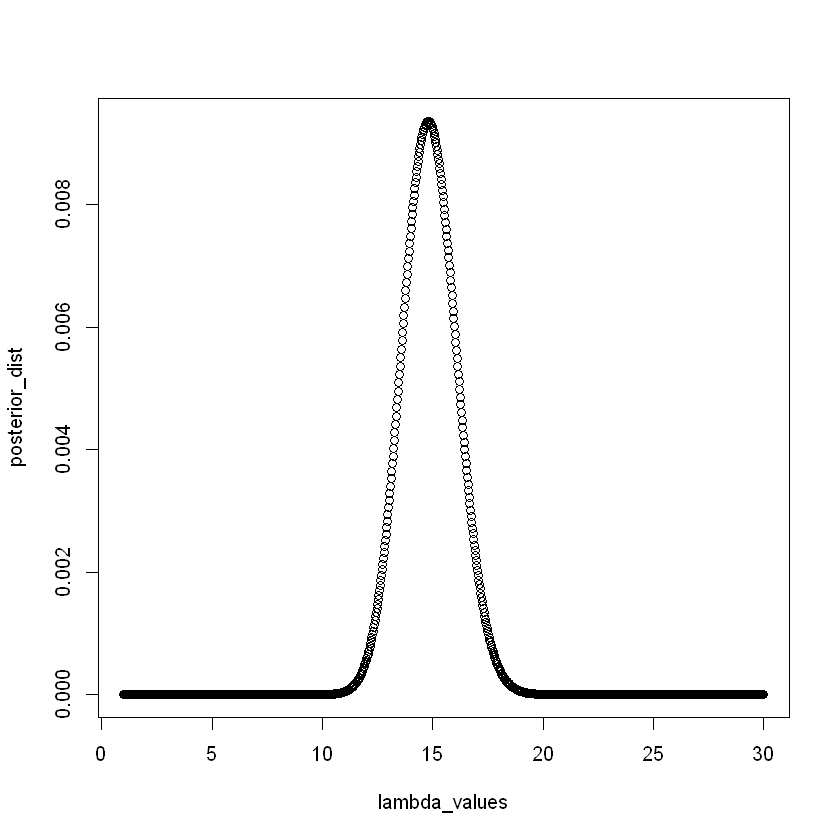

In [60]:
posterior_dist=sapply(lambda_values,posterior)
posterior_dist<-posterior_dist/sum(posterior_dist)
plot(lambda_values,posterior_dist)

In [72]:
# Normalizing constant (integral of the posterior)
normalizing_constant <- 1/integrate(posterior, lower = lower, upper = upper)$value
normalizing_constant
# Normalized posterior density
normalized_posterior <- function(lambda) {
  posterior(lambda)/normalizing_constant
}

[1] 2.033842e+259

In [73]:

# Predictive probability for y7 = 18
y7 <- 18

# predictive_probability <- function(lambda) {
#   dpois(y7, lambda) * posterior(lambda)
# }

predictive_probability <- function(lambda) {
  dpois(y7, lambda)
}

predictive_dist<- function(lambda) {
  predictive_probability(lambda)*normalized_posterior(lambda)
}

# Compute the weighted sum to approximate the predictive probability
# predictive_distribution <- sum(predictive_probabilities * posterior_density)


# Compute the predictive distribution via integration
predictive_distribution_value <- integrate(predictive_dist, lower = lower, upper = upper)$value

# Results
cat("Normalizing constant:", normalizing_constant, "\n")
cat("Approximate probability of exactly 18 requests on the 7th day:", predictive_distribution_value, "\n")

Normalizing constant: 2.033842e+259 
Approximate probability of exactly 18 requests on the 7th day: 0 


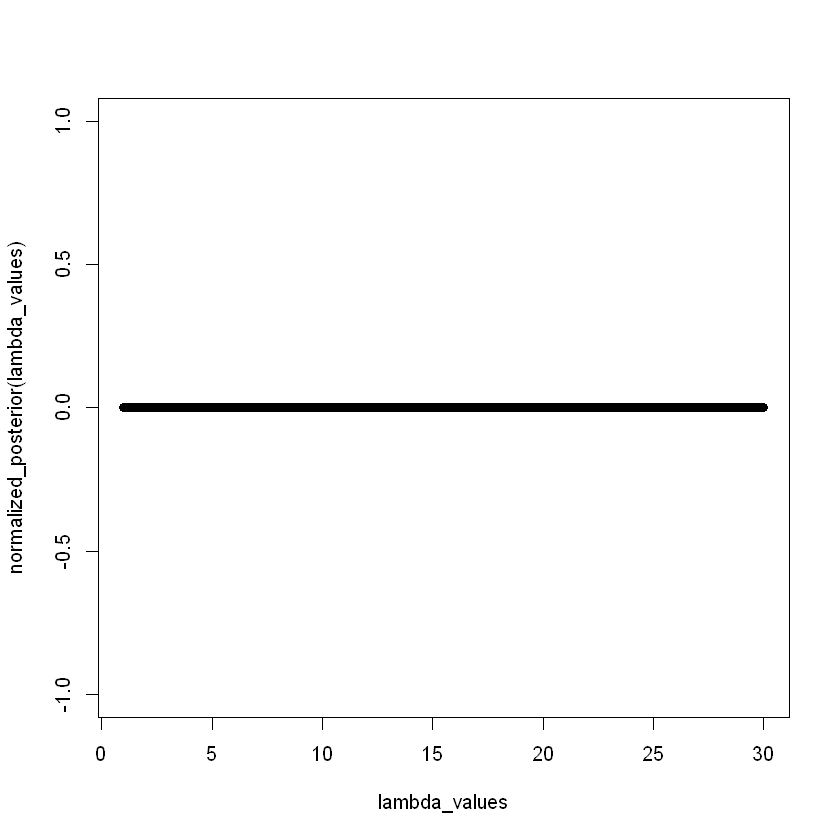

In [49]:
plot(lambda_values,normalized_posterior(lambda_values))

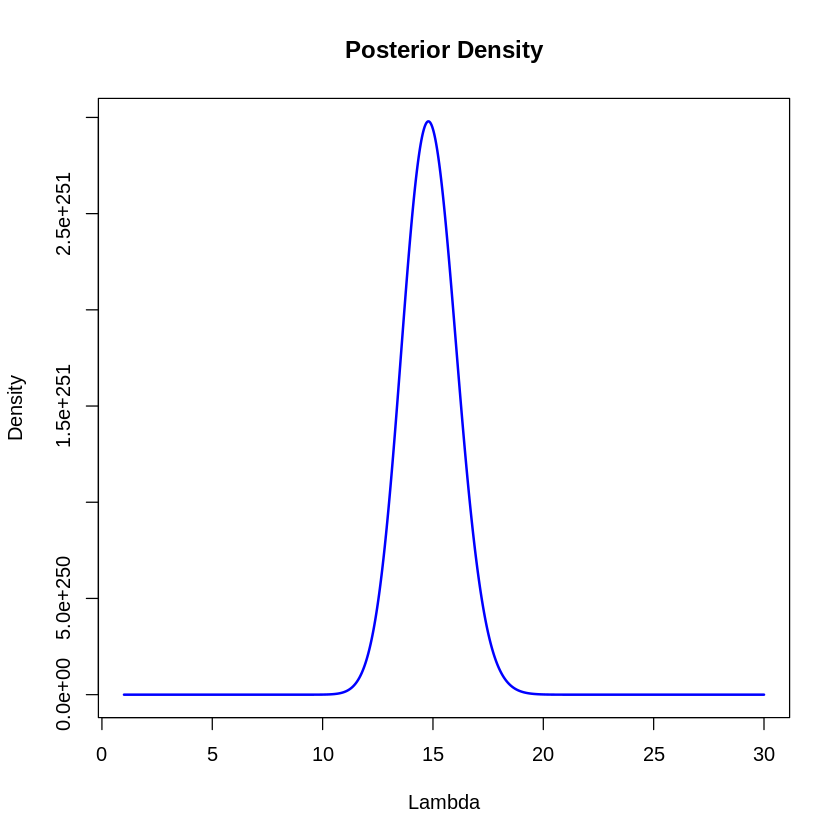

In [ ]:
# Plot the posterior density
posterior_values <- sapply(lambda_values, normalized_posterior)

plot(lambda_values, posterior_values, type = "l",
     main = "Posterior Density",
     xlab = "Lambda",
     ylab = "Density",
     col = "blue", lwd = 2)


## 2: Markov Chain
![graph](https://github.com/focccus/MVE550-Stochastic-processes/blob/main/A1/graph.png?raw=1)


A)

In [ ]:


Q_a <- matrix(c(0, 1, 1, 1, 1,
              0, 1, 1, 1, 1,
              0, 1, 0, 1, 1, # + 1/4 probability to 6
              0, 2, 0, 0, 1, # + 1/4 probability to 6
              0, 2, 1, 0, 0 # + 1/4 probability to 6
              ), 5, 5, byrow=T)/4

R_a <- c(0, 0, 1, 1, 1)/4
F_a <- solve(diag(5)-Q_a)
print(F_a)

     [,1]     [,2]      [,3]      [,4]     [,5]
[1,]    1 2.575758 1.2727273 1.2121212 1.515152
[2,]    0 3.575758 1.2727273 1.2121212 1.515152
[3,]    0 2.060606 1.8181818 0.9696970 1.212121
[4,]    0 2.363636 0.9090909 1.8181818 1.272727
[5,]    0 2.303030 1.0909091 0.8484848 2.060606


In [ ]:
# Probability of absorbtion (should be 1)
print(F_a%*%R_a)

     [,1]
[1,]    1
[2,]    1
[3,]    1
[4,]    1
[5,]    1


In [ ]:
# Expected number of steps to absorbtion is given by first element of F1
expected_number_of_steps_to_absorb_in_state_6 = F_a%*%rep(1, 5)
# expected number of throws to end up in state 6 starting in state 0
print(expected_number_of_steps_to_absorb_in_state_6[1])

[1] 7.575758


B)

In [ ]:
Q_b <- matrix(c(0, 1, 1, 1,
              0, 1, 1, 1,
              0, 1, 0, 1, # + 1/4 probability to 6
              0, 2, 1, 0 # + 1/4 probability to 6
              ), 4, 4, byrow=T)/4

R_b <- matrix(c(0, 1,

              0, 1,
              1, 1, # + 1/4 probability to 6
              1, 0 # + 1/4 probability to 6
              ), 4, 2, byrow=T)/4

In [ ]:
## Modified Chain with 3 as absorbing state
F_b <- solve(diag(4)-Q_b)

# Probability of absorbtion (should be 1)
probabilty_of_absorbtion = F_b%*%R_b
print(probabilty_of_absorbtion)
probabilty_of_visiting_state_3 = probabilty_of_absorbtion[1, 2]
print(probabilty_of_visiting_state_3)

          [,1]      [,2]
[1,] 0.3333333 0.6666667
[2,] 0.3333333 0.6666667
[3,] 0.4666667 0.5333333
[4,] 0.5333333 0.4666667
[1] 0.6666667


C)

In [ ]:
# P(V = 1) = P(visit 3 at least once) P(visit 3 never again when starting in 3) =
# P(visit 3 at least once) (1/4 + 1/4 P(visit 3 never again when starting in 4)+ 2/4 P(visit 3 never again when starting in 1)

probability_of_never_visiting_state_3 = 1/4 + 1/4*probabilty_of_absorbtion[4,1] + 2/4*probabilty_of_absorbtion[3,1]
probability_of_visiting_state_3_exactly_once = probabilty_of_visiting_state_3 * probability_of_never_visiting_state_3

#
probability_of_visiting_state_3_two_or_more_times = probabilty_of_visiting_state_3 - probability_of_visiting_state_3_exactly_once
print(probability_of_visiting_state_3_two_or_more_times)

[1] 0.2555556
